In [1]:
# 시각화 한글폰트 설정
import seaborn as sns
import matplotlib.pyplot as plt

plt.rc('font', family='Malgun Gothic')
sns.set(font="Malgun Gothic",#"NanumGothicCoding", 
        rc={"axes.unicode_minus":False}, # 마이너스 부호 깨짐 현상 해결
        style='darkgrid')

In [2]:
import pandas as pd


# 학습/평가 데이터 로딩
df_total = pd.read_csv("total.csv")

In [3]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.

df_total['기준일ID'] = pd.to_datetime(df_total['기준일ID'], format='%Y%m%d')

df_total['year'] = df_total['기준일ID'].dt.year
df_total['month'] = df_total['기준일ID'].dt.month
df_total['day'] = df_total['기준일ID'].dt.day
df_total['weekday'] = df_total['기준일ID'].dt.weekday

df_total = df_total[['year','month','day','weekday','시간대구분','총생활인구수']]
df_total.rename(columns={'시간대구분':'hour'},inplace=True)

In [4]:
df_total['2m'] = df_total['총생활인구수'].shift(24*63)

In [360]:
df_total = df_total.dropna()

In [362]:
datas = {'2m' : df_total['2m'],}
train_x = pd.DataFrame(datas)
train_x = train_x.reset_index(drop=True)

,2m
0,43922.2281
1,43763.4929
2,43561.5708
3,43928.9929
4,44150.2973
...,...
41995,35901.7349
41996,35450.9706
41997,35869.6831
41998,36629.8721


In [363]:
datas = {'총생활인구수' : df_total['총생활인구수']}
train_y = pd.DataFrame(datas)
train_y = train_y.reset_index(drop=True)

,총생활인구수
0,43335.6902
1,43808.1562
2,43119.5238
3,43633.2521
4,43782.4048
...,...
41995,33304.5400
41996,33368.7201
41997,34083.1721
41998,34380.0806


In [364]:
datas = {'총생활인구수' : df_total['총생활인구수']}
test_x = pd.DataFrame(datas)
test_x = test_x.reset_index(drop=True)
test_x = test_x[-1512:-96]

,총생활인구수
40488,39890.8588
40489,39692.6632
40490,39545.9509
40491,39435.3121
40492,39572.6156
...,...
41899,35235.4648
41900,35350.1723
41901,36038.6967
41902,36422.1194


In [365]:
# 아래에 실습코드를 작성하세요.

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score as r2
from math import sqrt

LR_reg = LinearRegression()
LR_reg.fit(train_x, train_y)

LinearRegression()

In [366]:
y_pred_LR = LR_reg.predict(test_x)

c:\users\김종한\appdata\local\programs\python\python38\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- 총생활인구수
Feature names seen at fit time, yet now missing:
- 2m

  warnings.warn(message, FutureWarning)


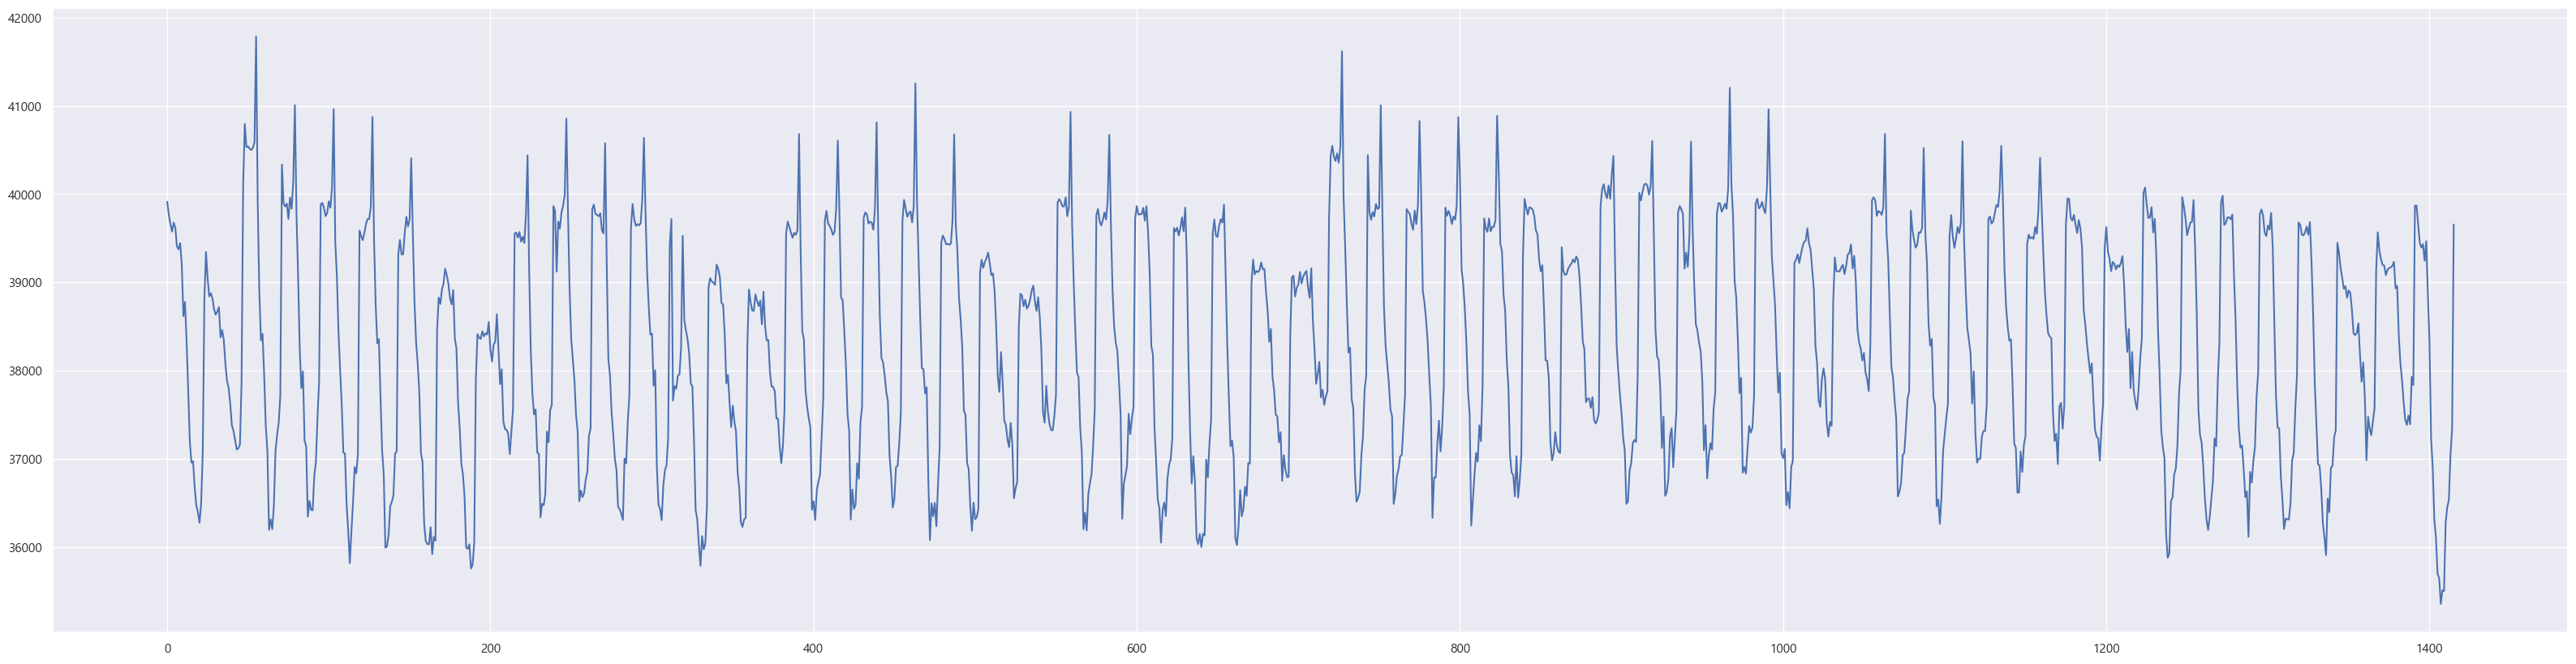

In [368]:
plt.figure(figsize=(40,10))
plt.plot(y_pred_LR)

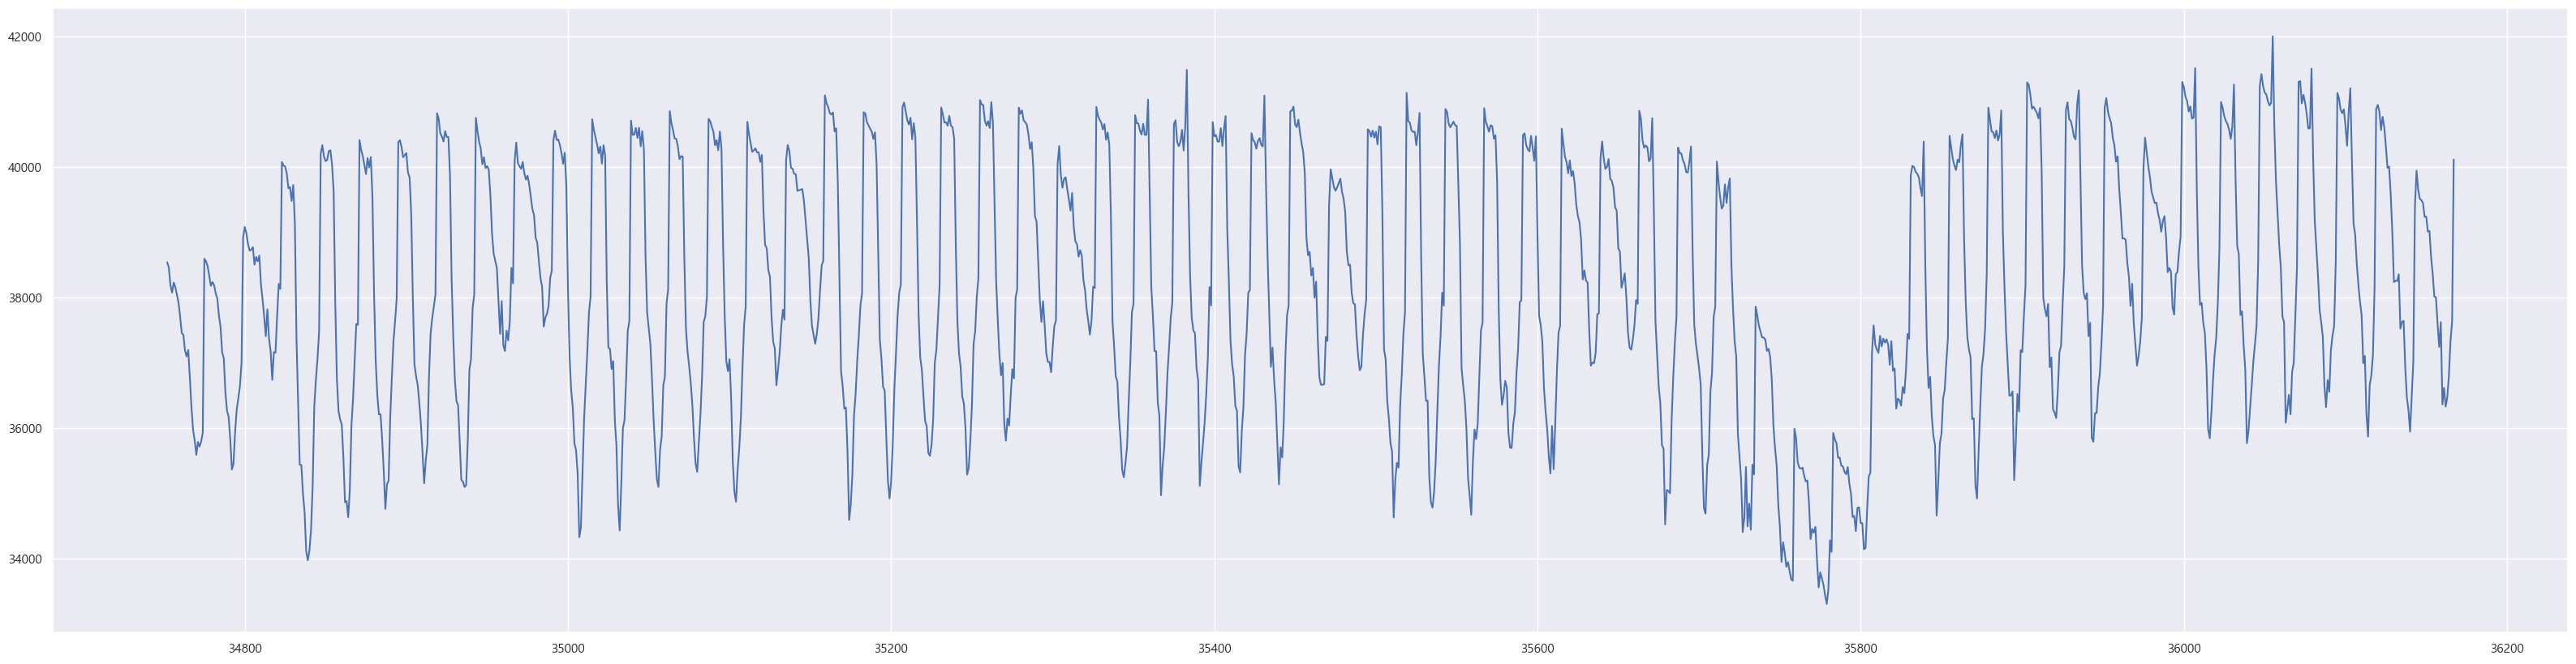

In [369]:
plt.figure(figsize=(40,10))
plt.plot(df_total[(df_total['year']==2021)& (df_total['month']>=1) & (df_total['month']<=2)]['총생활인구수'])

In [372]:
y_pred_LR[0:48] = y_pred_LR[0:48]-2000
y_pred_LR[696:792] = y_pred_LR[696:792]-4500
y_pred_LR = y_pred_LR.flatten()
y_pred_LR = y_pred_LR-500

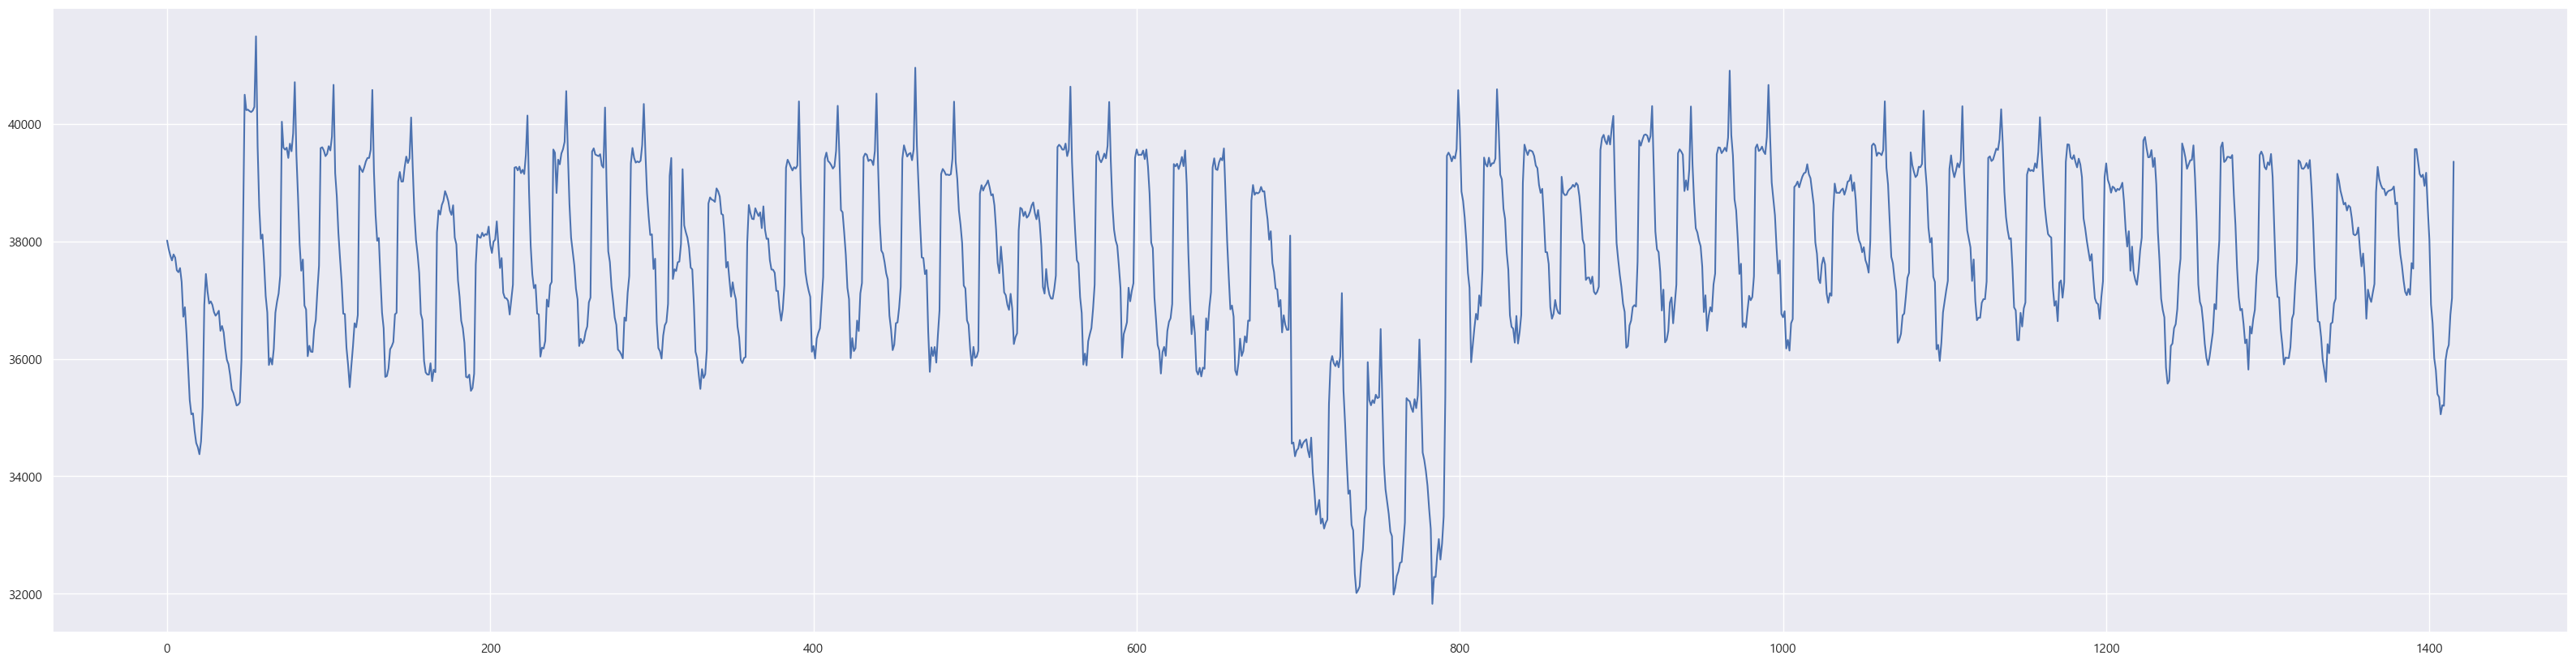

In [373]:
plt.figure(figsize=(40,10))
plt.plot(y_pred_LR)